Emerging Methods For Early Detection Of Forest Fires

Project Development Phase 

Sprint 4

Team ID:PNT2022TMID46260

Date: 17/11/2022

**Importing The ImageDataGenerator Library**

In [89]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='QVsKoX6yNRLn8Qv_RWlO4N-PlH8ddMdZyPPjLiIW1oz6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'imageclassification-donotdelete-pr-ncc5wgfie3fmsd'
object_key = 'Dataset.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [90]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [91]:
pwd

'/home/wsuser/work'

In [92]:
import os
filenames=os.listdir('/home/wsuser/work/Dataset/train_set')

In [93]:
!pip install libgl1-mesa-dev
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

ERROR: Could not find a version that satisfies the requirement libgl1-mesa-dev (from versions: none)
ERROR: No matching distribution found for libgl1-mesa-dev


**Define the parameters/arguments for ImageDataGenerator class**

In [94]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

**Applying ImageDataGenerator functionality to trainset**

In [95]:
x_train = train.flow_from_directory("/home/wsuser/work/Dataset/train_set",
                                          target_size=(64,64),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 436 images belonging to 2 classes.


**Applying ImageDataGenerator functionality to testset**

In [96]:
x_test = test.flow_from_directory("/home/wsuser/work/Dataset/test_set",
                                          target_size=(64,64),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 121 images belonging to 2 classes.


In [97]:
x_test.class_indices

{'forest': 0, 'with fire': 1}

**Import model building libraries**

In [98]:
#to define linear initialisation import sequential
from keras.models import Sequential
#to add layer import Dense
from keras.layers import Dense
#to create convolution kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')


**Initializing the model**

In [99]:
model =Sequential()

**Add CNN Layer**

In [100]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

**Add Hidden Layer**

In [101]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

**Configure the learning process**

In [102]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

**Train the model**

In [103]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=5,validation_data=x_test,validation_steps=20)

Epoch 1/5
14/14 [==============================] - 21s 1s/step - loss: 0.7689 - accuracy: 0.6628 - val_loss: 0.3151 - val_accuracy: 0.8678
Epoch 2/5
14/14 [==============================] - 15s 1s/step - loss: 0.2759 - accuracy: 0.8853
Epoch 3/5
14/14 [==============================] - 14s 1s/step - loss: 0.1619 - accuracy: 0.9472
Epoch 4/5
14/14 [==============================] - 14s 1s/step - loss: 0.1192 - accuracy: 0.9541
Epoch 5/5
14/14 [==============================] - 14s 1s/step - loss: 0.1087 - accuracy: 0.9633


**Save The Model**

In [104]:
model.save("/home/wsuser/work/archive(1)/forest1.h5")

**Predictions**

In [105]:
predictions = model.predict(x_test)
predictions = np.round(predictions)

In [106]:
predictions

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],

In [107]:
print(len(predictions))

121


In [108]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2

In [109]:
#load the saved model
model = load_model("/home/wsuser/work/archive(1)/forest1.h5")

In [110]:
def predictImage(filename):
  img1 = image.load_img(filename,target_size=(64,64))
  Y = image.img_to_array(img1)
  X = np.expand_dims(Y,axis=0)
  val = model.predict(X)
  print(val)
  if val == 1:
    print(" fire")
  elif val == 0:
      print("no fire")

In [111]:
predictImage("/home/wsuser/work/Dataset/test_set/with fire/19464620_401.jpg")

[[1.]]
 fire


**OpenCV For Video Processing**

In [75]:
pip install twilio

     |████████████████████████████████| 1.4 MB 16.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install playsound

  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7037 sha256=7a14e5d7212967bf1952d7558b36640342f7d1b687b5aa9dc5b0e950f2e73b31
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ba/39/54/c8f7ff9a88a644d3c58b4dec802d90b79a2e0fb2a6b884bf82
Successfully built playsound
Note: you may need to restart the kernel to use updated packages.


In [112]:
#import opencv librariy
#import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [113]:
#load the saved model
model = load_model(r'/home/wsuser/work/archive(1)/forest1.h5')
#define the features
name = ['forest','with forest']

**Creating An Account In Twilio Service**

In [114]:
account_sid='ACfb4e6d0e7b0d25def63044919f1b96e3'
auth_token='f9ae4fc4a617a527da8672e97eefb2d8'
client=Client(account_sid,auth_token)
message=client.messages \
.create(
      body='Forest Fire is detected, stay alert',
      from_='+1 302 248 4366',
      to='+91 99400 12164'
)
print(message.sid)

SMfa58e2bf0ede24f765cd7bc345ca795d


**Sending Alert Message**

In [81]:
pip install pygobject

     |████████████████████████████████| 719 kB 9.3 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/envs/Python-3.9/bin/python /tmp/wsuser/pip-standalone-pip-emeystgt/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /tmp/wsuser/pip-build-env-lkmf16by/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel pycairo
       cwd: None
  Complete output (38 lines):
    Installing build dependencies: started
    Installing build dependencies: finished with status 'done'
    Getting requirements to build wheel: started
    Getting requirements to build wheel: finished with status 'done'
      Preparing wheel metadata: started
      Preparing wheel metadata: finished with status 'done'
    ERROR: Command errored out with exit status 1:
     command: /opt/conda/envs/Python-3.9/bin/python /tmp/wsuser/tmp6f_pv7zl_in_process.py build_whe

In [115]:
def message(val):
  if val==1:
    from twilio.rest import Client
    print('Forest fire')
    account_sid='ACfb4e6d0e7b0d25def63044919f1b96e3'
    auth_token='f9ae4fc4a617a527da8672e97eefb2d8'
    client=Client(account_sid,auth_token)
    message=client.messages \
     .create(
        body='forest fire is detected, stay alert',
        #use twilio free number
        from_='+1 302 248 4366',
        #to number
        to='+91 99400 12164')
    print(message.sid)
    print("Fire detected")
    print("SMS Sent!")
  elif val==0:
    print('No Fire')

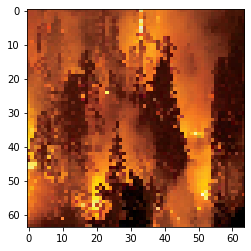

Forest fire
SM90c5f1e42f00ef91e0d7497f8db60527
Fire detected
SMS Sent!


In [116]:
from matplotlib import pyplot as plt
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/home/wsuser/work/Dataset/test_set/with fire/Wild_fires.jpg',target_size=(64,64))
Y = image.img_to_array(img1)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img1)
plt.show()
message(val)

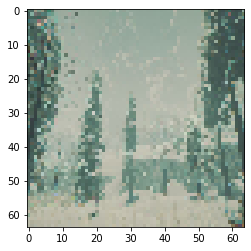

No Fire


In [117]:
img2 = image.load_img('/home/wsuser/work/Dataset/test_set/forest/1200px_Mountainarea.jpg',target_size=(64,64))
Y = image.img_to_array(img2)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img2)
plt.show()
message(val)

In [119]:
from ibm_watson_machine_learning import APIClient
wml_credentials={"url":"https://us-south.ml.cloud.ibm.com","apikey":"TFXoHzN3M76f8UM68mdo_MshGtF2Dk1H56fJ67oDagbV"}
client=APIClient(wml_credentials)

In [120]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources']if item['entity']["name"]==space_name)['metadata']['id'])

In [121]:
space_uid=guid_from_space_name(client,'imageclassification')
print("Space UID= "+space_uid)

Space UID= 1f4924ef-b4eb-471f-a528-7b437fc3efb9


In [122]:
client.set.default_space(space_uid)

'SUCCESS'

In [123]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [126]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_1.15-py3.6")
software_spec_uid

'2b73a275-7cbf-420b-a912-eae7f436e0bc'

In [128]:
keras

<module 'tensorflow.keras' from '/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/keras/api/_v2/keras/__init__.py'>